In [2]:
import numpy as np
import pandas as pd
import scipy.linalg as la
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
import sghmc_algo as sghmc

## Example 1 on paper pg6 (fig 1)

$U(\theta) = 2\theta^2+\theta^4$  
$\nabla U(\theta) = -4\theta + 4\theta^3$  
$\nabla\tilde{U}(\theta) = \nabla U(\theta)+\mathcal{N}(0,4) = -4\theta + 4\theta^3 + \mathcal{N}(0,4)$ 

In [32]:
np.random.seed(123)
n = 100
x = np.zeros((100, 1))
theta_0 = np.array([0.0])
p = theta_0.shape[0]
eps = 0.1
C = np.eye(1)
V = np.eye(1)*4
batch_size = 1
epochs = 4000
burns = 200

In [33]:
def gradU_noise(theta, x, n, batch_size):
    '''noisy gradient from paper fig1'''
    return -4*theta + 4*theta**3 + np.random.normal(0,2)

In [36]:
sim = sghmc.sghmc(gradU_noise, eps, C, np.eye(p), theta_0, V, epochs, burns, x, batch_size)

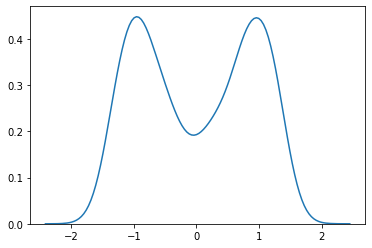

In [35]:
sns.kdeplot(sim[0,:])

## Mixture of Normals

sampling model: $X \sim \frac{1}{2}\mathcal{N}(\mu_1, 1) + \frac{1}{2}\mathcal{N}(\mu_2, 1)$  

prior: $\mu_1, \mu_2 \sim \mathcal{N}(0, 10)$

In [101]:
import sys
!{sys.executable} -m pip install autograd #install package to calculate gradient

  Created wheel for autograd: filename=autograd-1.3-py3-none-any.whl size=48961 sha256=838ef1a398c60c5c3e8345f30643c0f0aa4260d40065952731b1c61ea62acd69
  Stored in directory: /home/jovyan/.cache/pip/wheels/b2/a5/3c/929b91003a3b75a175ccba7cef35200a1890cdb46903f18072
Successfully built autograd


In [37]:
from autograd import jacobian
import autograd.numpy as np

In [38]:
mu = np.array([-3,3]).reshape(2,1)

In [39]:
def lprior(theta):
    return (-1/(2*10))*theta.T@theta

def ldatap(theta, x):
    return np.log(0.5 * np.exp(-0.5*(theta[0]-x)**2) + 0.5* np.exp(-0.5*(theta[1]-x)**2))

def U(theta, x, n, batch_size):
    return -lprior(theta) - (n/batch_size)*sum(ldatap(theta, x))

gradU = jacobian(U, argnum = 0)

In [40]:
np.random.seed(123)
n = 200
x = np.r_[
    np.random.normal(mu[0], 1, n),
    np.random.normal(mu[1], 1, n)].reshape(-1,1)

theta_0 = np.array([0, 0])
eps = 0.01
V_hat = np.eye(2)
C = np.eye(2)
epochs = 200
burns = 100
batch_size = 80

In [41]:
sim_mn = sghmc.sghmc(gradU, eps, C, np.eye(2), theta_0, V_hat, epochs, burns, x, batch_size)

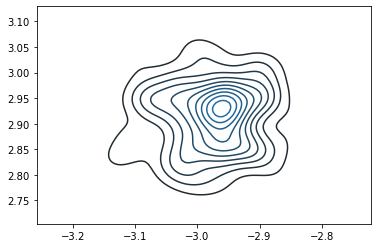

In [42]:
sns.kdeplot(sim_mn[0,:],sim_mn[1,:])

In [44]:
from pyhmc import hmc

## Example 2, pyhmc

In [18]:
def logprob(theta):
        logp = np.sum(U(theta, x=x, n=n, batch_size=n))
        gradu = gradU(theta, x=x, n=n, batch_size=n).reshape((-1,))
        return logp, gradu

In [24]:
sim_hmc = hmc(logprob, x0=mu.reshape(-1), n_samples=100, epsilon=0.01)

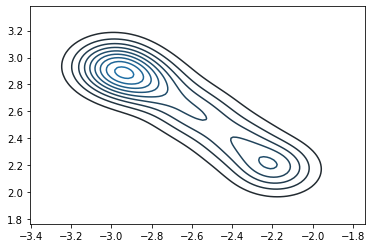

In [29]:
sns.kdeplot(sim_hmc[:,0], sim_hmc[:,1])